<h1 align="center">Radiación de cuerpo negro: análisis de datos<br>Ley de Wien y Ley de Stefan-Botlzmann</h1>
<div align="right">David A. Miranda, PhD<br>2020</div>

Aquí aprenderás cómo analizar los datos obtenidos con el simulador [*blackbody spectrum* PeTH](https://phet.colorado.edu/sims/html/blackbody-spectrum/latest/blackbody-spectrum_es.html).

[Video explicativo](https://youtu.be/_uZEDsBww3w)

# 1. Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Datos

In [2]:
T = 'T [K]'
L = r'$\lambda_{max}$ $[\mu m]$'
E_max = r'$E_{max}$ $[M W /μm m^2]$'
I = r'$I$ $[W/m^2]$'
columns = [T, L, E_max, I]
data_array = np.array([
    [ 200, 14.489,	4.00E-06,	9.07E+01],
    [ 450,  6.439,	2.00E-04,	2.33E+03],
    [ 950,  3.050,	1.00E-02,	4.62E+04],
    [1500,  1.932,	1.00E-01,	2.87E+05],
    [2000,  1.449,	4.10E-01,	9.07E+05],
    [2500,  1.159,	1.26E+00,	2.22E+06],
    [3000,  0.966,	3.13E+00,	4.59E+06],
    [3500,  0.828,	6.76E+00,	8.51E+06],
    [4050,  0.715,	1.40E+01,	1.53E+07],
    [4500,  0.644,	2.37E+01,	2.33E+07],
    [4950,  0.585,	3.82E+01,	3.40E+07],
    [5500,  0.527,	6.48E+01,	5.19E+07],
    [5800,  0.500,	8.45E+01,	6.42E+07],
])
data = pd.DataFrame(data_array, columns=columns)
data

,T [K],$\lambda_{max}$ $[\mu m]$,$E_{max}$ $[M W /μm m^2]$,$I$ $[W/m^2]$
0,200.0,14.489,0.000004,90.7
1,450.0,6.439,0.000200,2330.0
2,950.0,3.050,0.010000,46200.0
3,1500.0,1.932,0.100000,287000.0
4,2000.0,1.449,0.410000,907000.0
5,2500.0,1.159,1.260000,2220000.0
6,3000.0,0.966,3.130000,4590000.0
7,3500.0,0.828,6.760000,8510000.0
8,4050.0,0.715,14.000000,15300000.0
9,4500.0,0.644,23.700000,23300000.0


# 3. Ley de desplazamiento de Wien
La ley de deplazamiento de Wien relaciona la temperatura del cuerpo negro $T$ con la longitud de onda $\lambda_{max}$ a la cual se presenta la mayor densidad de potencia espectral $E(\lambda, T)$, $$\lambda_{max}T = b$$
Donde $b = 2.8976\times 10^{-3} [mK]$ es la constante de Wien.

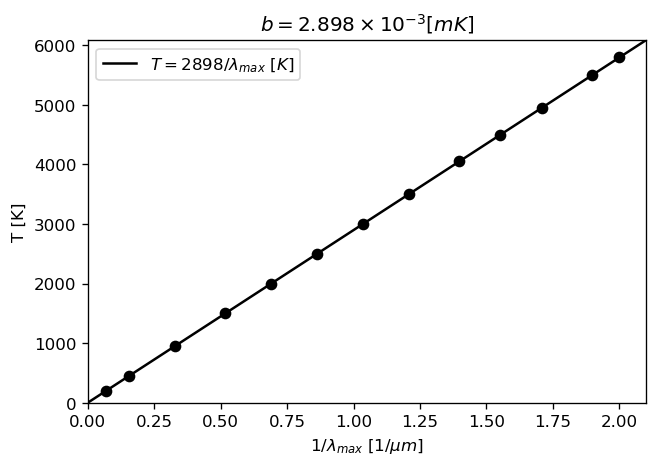

In [3]:
x = 1/data[L]
y = data[T]
p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 1.05*x.max(), 10)
y_fit = np.polyval(p, x_fit)
plt.figure(dpi=120)
plt.plot(x, y, 'ok')
plt.plot(x_fit, y_fit, 'k', label=r'$T = %0.4g / \lambda_{max}$ $[K]$' % p[0])
plt.legend()
plt.ylabel(T)
plt.xlabel(r'$1/\lambda_{max}$ $[1/\mu m]$')
plt.axis([min(x_fit), max(x_fit), min(y_fit), max(y_fit)])
_ = plt.title(r'$b = %0.4g \times 10^{-3} [mK]$' % (1e-3*p[0]))

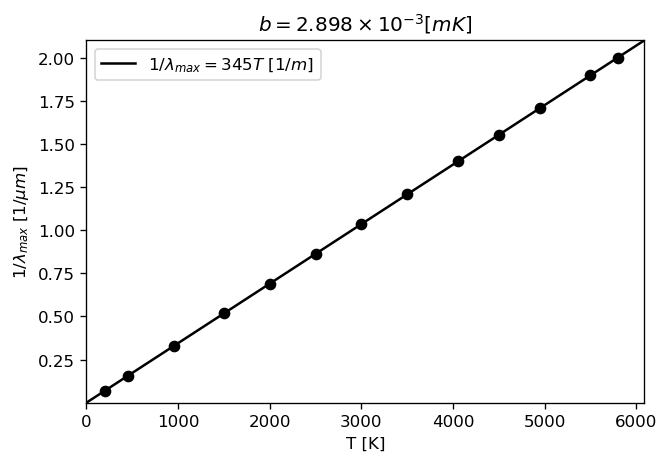

In [4]:
x = data[T]
y = 1/data[L]
p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 1.05*x.max(), 10)
y_fit = np.polyval(p, x_fit)
plt.figure(dpi=120)
plt.plot(x, y, 'ok')
plt.plot(x_fit, y_fit, 'k', label=r'$1/\lambda_{max}=%0.4g T$ $[1/m]$' % (1e6*p[0]))
plt.legend()
plt.xlabel(T)
plt.ylabel(r'$1/\lambda_{max}$ $[1/\mu m]$')
plt.axis([min(x_fit), max(x_fit), min(y_fit), max(y_fit)])
_ = plt.title(r'$b = %0.4g \times 10^{-3} [mK]$' % (1e-3/p[0]))

# 4. Ley de Stefan-Boltzmann
Esta ley establece que la intensidad $I$, es decir, el área bajo la curva de densidad de potencia espectral $I(T) = \int{E(\lambda, T)d\lambda}$, es proporcional a la cuarta potencia de la temperatura, $$ I(T)=\sigma T^4$$

Donde $\sigma = 5.67\times 10^{-8} [W/m^2K^4]$.

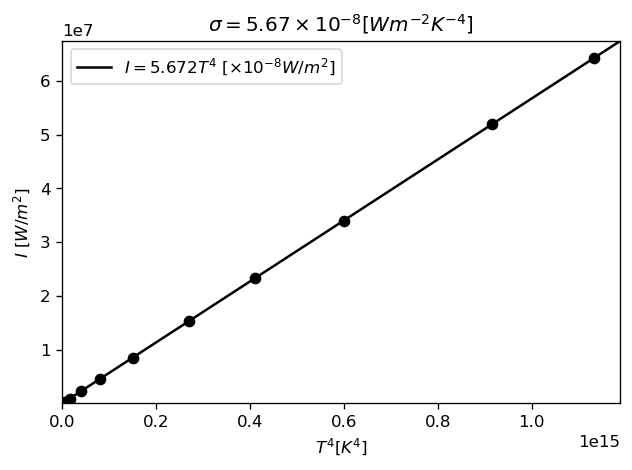

In [5]:
x = data[T]**4
y = data[I]
p = np.polyfit(x, y, 1)
x_fit = np.linspace(0, 1.05*x.max(), 10)
y_fit = np.polyval(p, x_fit)
plt.figure(dpi=120)
plt.plot(x, y, 'ok')
plt.plot(x_fit, y_fit, 'k', label=r'$I=%0.4g T^4$ $[\times 10^{-8}W/m^{2}]$' % (1e8*p[0]))
plt.legend()
plt.xlabel(r'$T^4 [K^4]$')
plt.ylabel(I)
plt.axis([min(x_fit), max(x_fit), min(y_fit), max(y_fit)])
_ = plt.title(r'$\sigma = %0.3g \times 10^{-8} [Wm^{-2}K^{-4}]$' % (1e8*p[0]))

End!